In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import scale, StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score

In [ ]:
df = pd.read_excel('/content/drive/MyDrive/8101 Customer Analytics/Customer_ClusterResultV2.xlsx')

In [ ]:
df = df[df['CUST_CODE'] != 'CUST0000340481']

In [ ]:
clusters = df.drop(['Start_Date'], axis=1)
clusters = clusters.drop(['Last_Date'], axis=1)
clusters = clusters.drop(['BASKET_SIZE_S'], axis=1)
clusters = clusters.drop(['BASKET_SIZE_M'], axis=1)
clusters = clusters.drop(['BASKET_SIZE_L'], axis=1)
clusters = clusters.drop(['CUST_CODE'], axis=1)
clusters = clusters.drop(['MOD_CUST_LIFESTAGE'], axis=1)
clusters = clusters.drop(['CUST_LIFESTAGE'], axis=1)
clusters = clusters.drop(['MOD_CUST_PRICE_SENSITIVITY'], axis=1)
clusters = clusters.drop(['CUST_PRICE_SENSITIVITY'], axis=1)

In [ ]:
clusters.Clusters.value_counts().sort_index()

0.0     353
1.0    1202
2.0     970
3.0     912
Name: Clusters, dtype: int64

In [ ]:
clusters.iloc[:, :-1]

,FQ,Total_Spend,MTBP,Life_Time,ARPU,CLTV,BASKET_PRICE_SENSITIVITY_LA,BASKET_PRICE_SENSITIVITY_MM,BASKET_PRICE_SENSITIVITY_UM,BASKET_PRICE_SENSITIVITY_XX,...,BASKET_TYPE_XX,BASKET_MISSION_Fresh,BASKET_MISSION_Grocery,BASKET_MISSION_Mixed,BASKET_MISSION_Non_Food,MOD_CUST_LIFESTAGE_CD,MOD_CUST_PRICE_SENSITIVITY_CD,BASKET_SIZE_L%,BASKET_SIZE_M%,BASKET_SIZE_S%
0,1,10.73,0.0,708,10.73,7596.84,0,1,0,0,...,0,0,1,0,0,5,3,0.0,0.0,1.0
1,1,2.92,0.0,333,2.92,972.36,0,1,0,0,...,0,0,1,0,0,1,3,0.0,0.0,1.0
2,1,2.83,0.0,238,2.83,673.54,0,1,0,0,...,0,0,1,0,0,5,1,0.0,0.0,1.0
3,1,2.23,0.0,503,2.23,1121.69,0,1,0,0,...,0,0,1,0,0,1,0,0.0,0.0,1.0
4,1,1.89,0.0,166,1.89,313.74,0,1,0,0,...,0,0,1,0,0,2,0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3433,1,32.97,0.0,675,32.97,22254.75,0,1,0,0,...,1,0,0,0,0,5,3,0.0,1.0,0.0
3434,1,41.76,0.0,328,41.76,13697.28,0,1,0,0,...,1,0,0,0,0,5,1,0.0,1.0,0.0
3435,1,0.03,0.0,399,0.03,11.97,0,0,0,1,...,1,0,0,0,0,5,3,0.0,1.0,0.0
3436,1,0.03,0.0,125,0.03,3.75,0,0,0,1,...,1,0,0,0,0,5,3,0.0,1.0,0.0


In [18]:
clusters.columns

Index(['FQ', 'Total_Spend', 'MTBP', 'Life_Time', 'ARPU', 'CLTV',
       'BASKET_PRICE_SENSITIVITY_LA', 'BASKET_PRICE_SENSITIVITY_MM',
       'BASKET_PRICE_SENSITIVITY_UM', 'BASKET_PRICE_SENSITIVITY_XX',
       'BASKET_TYPE_Small_Shop', 'BASKET_TYPE_Top_Up', 'BASKET_TYPE_Full_Shop',
       'BASKET_TYPE_XX', 'BASKET_MISSION_Fresh', 'BASKET_MISSION_Grocery',
       'BASKET_MISSION_Mixed', 'BASKET_MISSION_Non_Food',
       'MOD_CUST_LIFESTAGE_CD', 'MOD_CUST_PRICE_SENSITIVITY_CD',
       'BASKET_SIZE_L%', 'BASKET_SIZE_M%', 'BASKET_SIZE_S%', 'Clusters'],
      dtype='object')

In [20]:
buying = ['FQ', 'Total_Spend', 'MTBP', 'Life_Time', 'ARPU', 'CLTV','MOD_CUST_LIFESTAGE_CD', 'MOD_CUST_PRICE_SENSITIVITY_CD']
price  = ['BASKET_PRICE_SENSITIVITY_LA', 'BASKET_PRICE_SENSITIVITY_MM','BASKET_PRICE_SENSITIVITY_UM', 'BASKET_PRICE_SENSITIVITY_XX']
baskettype =['BASKET_TYPE_Small_Shop', 'BASKET_TYPE_Top_Up', 'BASKET_TYPE_Full_Shop','BASKET_TYPE_XX']
mission = ['BASKET_MISSION_Fresh', 'BASKET_MISSION_Grocery','BASKET_MISSION_Mixed', 'BASKET_MISSION_Non_Food']
size = ['BASKET_SIZE_L%', 'BASKET_SIZE_M%', 'BASKET_SIZE_S%']

In [25]:
from IPython.display import HTML

desc = clusters.groupby('Clusters').describe()
for col in buying:
    display(HTML(f"<h4>{col.upper()}</h4>"))
    display(desc[col].style.bar(color='lavender'))
    display(HTML('<hr/>'))

,count,mean,std,min,25%,50%,75%,max
Clusters,,,,,,,,
0.000000,353.000000,20.084986,50.140979,1.000000,2.000000,4.000000,14.000000,529.000000
1.000000,1202.000000,18.310316,44.173596,1.000000,1.000000,4.000000,13.750000,624.000000
2.000000,970.000000,4.255670,10.239576,1.000000,1.000000,2.000000,3.000000,180.000000
3.000000,912.000000,35.009868,62.893817,1.000000,2.000000,9.000000,37.000000,564.000000


,count,mean,std,min,25%,50%,75%,max
Clusters,,,,,,,,
0.000000,353.000000,471.295637,885.885332,11.660000,54.390000,125.960000,440.130000,7189.030000
1.000000,1202.000000,185.409983,504.697793,0.030000,8.145000,27.120000,119.785000,5240.340000
2.000000,970.000000,23.167866,105.911108,0.010000,1.082500,2.645000,9.465000,2348.450000
3.000000,912.000000,588.981316,1030.676404,2.730000,41.492500,140.010000,575.130000,8281.660000


/usr/local/lib/python3.10/dist-packages/pandas/io/formats/style.py:4165: RuntimeWarning: invalid value encountered in double_scalars
  end = (x - left) / (right - left)


,count,mean,std,min,25%,50%,75%,max
Clusters,,,,,,,,
0.000000,353.000000,55.622183,71.499233,0.000000,2.000000,22.166667,85.000000,358.000000
1.000000,1202.000000,49.964672,66.319191,0.000000,0.000000,24.984375,71.400000,382.500000
2.000000,970.000000,46.733497,75.666050,0.000000,0.000000,2.000000,65.500000,391.000000
3.000000,912.000000,38.335262,49.040471,0.000000,4.493785,21.574324,53.832143,402.500000


,count,mean,std,min,25%,50%,75%,max
Clusters,,,,,,,,
0.000000,353.000000,593.218130,207.368155,105.000000,429.000000,657.000000,776.000000,827.000000
1.000000,1202.000000,590.945092,205.906041,103.000000,437.000000,654.500000,768.750000,827.000000
2.000000,970.000000,502.789691,218.635692,100.000000,311.000000,529.500000,698.000000,827.000000
3.000000,912.000000,646.864035,194.352467,104.000000,531.000000,716.000000,808.000000,827.000000


,count,mean,std,min,25%,50%,75%,max
Clusters,,,,,,,,
0.000000,353.000000,36.850838,22.853553,4.759216,21.890000,32.981000,44.860000,181.970000
1.000000,1202.000000,8.755505,7.625090,0.030000,3.908750,6.818045,10.896000,93.610000
2.000000,970.000000,3.137987,4.527959,0.010000,0.852083,1.540000,3.297500,41.936607
3.000000,912.000000,18.850934,10.585634,1.499231,11.747750,16.645000,23.409837,88.190000


,count,mean,std,min,25%,50%,75%,max
Clusters,,,,,,,,
0.000000,353.000000,20875.859883,13910.959951,2111.226667,10889.616000,17582.413939,27658.151029,103358.960000
1.000000,1202.000000,5340.835048,5208.446339,3.750000,1982.420000,3856.260000,6880.087750,34987.874595
2.000000,970.000000,1644.453454,2856.679014,1.270000,335.777500,724.545000,1634.637500,34429.954464
3.000000,912.000000,11986.477641,7451.001765,374.960000,6701.385472,10173.954193,15882.153500,56789.200000


,count,mean,std,min,25%,50%,75%,max
Clusters,,,,,,,,
0.000000,353.000000,3.475921,2.039417,0.000000,2.000000,5.000000,5.000000,6.000000
1.000000,1202.000000,3.192180,2.143209,0.000000,1.000000,4.000000,5.000000,6.000000
2.000000,970.000000,3.164948,2.143849,0.000000,1.000000,3.000000,5.000000,6.000000
3.000000,912.000000,3.258772,2.085160,0.000000,1.000000,4.000000,5.000000,6.000000


,count,mean,std,min,25%,50%,75%,max
Clusters,,,,,,,,
0.000000,353.000000,0.951841,1.058222,0.000000,0.000000,1.000000,1.000000,3.000000
1.000000,1202.000000,1.411814,1.204748,0.000000,0.000000,1.000000,3.000000,3.000000
2.000000,970.000000,1.407216,1.176020,0.000000,1.000000,1.000000,3.000000,3.000000
3.000000,912.000000,1.302632,1.187417,0.000000,0.000000,1.000000,3.000000,3.000000


In [26]:
desc = clusters.groupby('Clusters').describe()
for col in price:
    display(HTML(f"<h4>{col.upper()}</h4>"))
    display(desc[col].style.bar(color='lavender'))
    display(HTML('<hr/>'))

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/style.py:4165: RuntimeWarning: invalid value encountered in double_scalars
  end = (x - left) / (right - left)


,count,mean,std,min,25%,50%,75%,max
Clusters,,,,,,,,
0.000000,353.000000,0.286119,0.452587,0.000000,0.000000,0.000000,1.000000,1.000000
1.000000,1202.000000,0.188020,0.390891,0.000000,0.000000,0.000000,0.000000,1.000000
2.000000,970.000000,0.113402,0.317247,0.000000,0.000000,0.000000,0.000000,1.000000
3.000000,912.000000,0.198465,0.399063,0.000000,0.000000,0.000000,0.000000,1.000000


,count,mean,std,min,25%,50%,75%,max
Clusters,,,,,,,,
0.000000,353.000000,0.648725,0.478046,0.000000,0.000000,1.000000,1.000000,1.000000
1.000000,1202.000000,0.582363,0.493375,0.000000,0.000000,1.000000,1.000000,1.000000
2.000000,970.000000,0.776289,0.416946,0.000000,1.000000,1.000000,1.000000,1.000000
3.000000,912.000000,0.555921,0.497136,0.000000,0.000000,1.000000,1.000000,1.000000


,count,mean,std,min,25%,50%,75%,max
Clusters,,,,,,,,
0.000000,353.000000,0.121813,0.327534,0.000000,0.000000,0.000000,0.000000,1.000000
1.000000,1202.000000,0.227121,0.419146,0.000000,0.000000,0.000000,0.000000,1.000000
2.000000,970.000000,0.089691,0.285886,0.000000,0.000000,0.000000,0.000000,1.000000
3.000000,912.000000,0.212719,0.409455,0.000000,0.000000,0.000000,0.000000,1.000000


,count,mean,std,min,25%,50%,75%,max
Clusters,,,,,,,,
0.000000,353.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1.000000,1202.000000,0.012479,0.111057,0.000000,0.000000,0.000000,0.000000,1.000000
2.000000,970.000000,0.054639,0.227392,0.000000,0.000000,0.000000,0.000000,1.000000
3.000000,912.000000,0.004386,0.066117,0.000000,0.000000,0.000000,0.000000,1.000000


In [27]:
desc = clusters.groupby('Clusters').describe()
for col in baskettype:
    display(HTML(f"<h4>{col.upper()}</h4>"))
    display(desc[col].style.bar(color='lavender'))
    display(HTML('<hr/>'))

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/style.py:4165: RuntimeWarning: invalid value encountered in double_scalars
  end = (x - left) / (right - left)


,count,mean,std,min,25%,50%,75%,max
Clusters,,,,,,,,
0.000000,353.000000,0.138810,0.346239,0.000000,0.000000,0.000000,0.000000,1.000000
1.000000,1202.000000,0.806156,0.395472,0.000000,1.000000,1.000000,1.000000,1.000000
2.000000,970.000000,0.964948,0.184005,0.000000,1.000000,1.000000,1.000000,1.000000
3.000000,912.000000,0.187500,0.390527,0.000000,0.000000,0.000000,0.000000,1.000000


,count,mean,std,min,25%,50%,75%,max
Clusters,,,,,,,,
0.000000,353.000000,0.133144,0.340213,0.000000,0.000000,0.000000,0.000000,1.000000
1.000000,1202.000000,0.183860,0.387531,0.000000,0.000000,0.000000,0.000000,1.000000
2.000000,970.000000,0.025773,0.158540,0.000000,0.000000,0.000000,0.000000,1.000000
3.000000,912.000000,0.622807,0.484950,0.000000,0.000000,1.000000,1.000000,1.000000


,count,mean,std,min,25%,50%,75%,max
Clusters,,,,,,,,
0.000000,353.000000,0.807365,0.394928,0.000000,1.000000,1.000000,1.000000,1.000000
1.000000,1202.000000,0.014975,0.121503,0.000000,0.000000,0.000000,0.000000,1.000000
2.000000,970.000000,0.004124,0.064117,0.000000,0.000000,0.000000,0.000000,1.000000
3.000000,912.000000,0.051535,0.221208,0.000000,0.000000,0.000000,0.000000,1.000000


,count,mean,std,min,25%,50%,75%,max
Clusters,,,,,,,,
0.000000,353.000000,0.002833,0.053225,0.000000,0.000000,0.000000,0.000000,1.000000
1.000000,1202.000000,0.009151,0.095264,0.000000,0.000000,0.000000,0.000000,1.000000
2.000000,970.000000,0.024742,0.155419,0.000000,0.000000,0.000000,0.000000,1.000000
3.000000,912.000000,0.002193,0.046804,0.000000,0.000000,0.000000,0.000000,1.000000


In [28]:
desc = clusters.groupby('Clusters').describe()
for col in mission:
    display(HTML(f"<h4>{col.upper()}</h4>"))
    display(desc[col].style.bar(color='lavender'))
    display(HTML('<hr/>'))

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/style.py:4165: RuntimeWarning: invalid value encountered in double_scalars
  end = (x - left) / (right - left)


,count,mean,std,min,25%,50%,75%,max
Clusters,,,,,,,,
0.000000,353.000000,0.359773,0.480615,0.000000,0.000000,0.000000,1.000000,1.000000
1.000000,1202.000000,0.544093,0.498259,0.000000,0.000000,1.000000,1.000000,1.000000
2.000000,970.000000,0.363918,0.481374,0.000000,0.000000,0.000000,1.000000,1.000000
3.000000,912.000000,0.519737,0.499884,0.000000,0.000000,1.000000,1.000000,1.000000


,count,mean,std,min,25%,50%,75%,max
Clusters,,,,,,,,
0.000000,353.000000,0.093484,0.291523,0.000000,0.000000,0.000000,0.000000,1.000000
1.000000,1202.000000,0.171381,0.376998,0.000000,0.000000,0.000000,0.000000,1.000000
2.000000,970.000000,0.423711,0.494401,0.000000,0.000000,0.000000,1.000000,1.000000
3.000000,912.000000,0.060307,0.238185,0.000000,0.000000,0.000000,0.000000,1.000000


,count,mean,std,min,25%,50%,75%,max
Clusters,,,,,,,,
0.000000,353.000000,0.521246,0.500257,0.000000,0.000000,1.000000,1.000000,1.000000
1.000000,1202.000000,0.132280,0.338935,0.000000,0.000000,0.000000,0.000000,1.000000
2.000000,970.000000,0.070103,0.255452,0.000000,0.000000,0.000000,0.000000,1.000000
3.000000,912.000000,0.255482,0.436371,0.000000,0.000000,0.000000,1.000000,1.000000


,count,mean,std,min,25%,50%,75%,max
Clusters,,,,,,,,
0.000000,353.000000,0.002833,0.053225,0.000000,0.000000,0.000000,0.000000,1.000000
1.000000,1202.000000,0.044925,0.207226,0.000000,0.000000,0.000000,0.000000,1.000000
2.000000,970.000000,0.159794,0.366604,0.000000,0.000000,0.000000,0.000000,1.000000
3.000000,912.000000,0.007675,0.087321,0.000000,0.000000,0.000000,0.000000,1.000000


In [29]:
desc = clusters.groupby('Clusters').describe()
for col in size:
    display(HTML(f"<h4>{col.upper()}</h4>"))
    display(desc[col].style.bar(color='lavender'))
    display(HTML('<hr/>'))

,count,mean,std,min,25%,50%,75%,max
Clusters,,,,,,,,
0.000000,353.000000,0.818389,0.245070,0.078431,0.666667,1.000000,1.000000,1.000000
1.000000,1202.000000,0.142982,0.213346,0.000000,0.000000,0.000000,0.250000,1.000000
2.000000,970.000000,0.035469,0.125563,0.000000,0.000000,0.000000,0.000000,1.000000
3.000000,912.000000,0.636396,0.283792,0.000000,0.433333,0.625000,1.000000,1.000000


/usr/local/lib/python3.10/dist-packages/pandas/io/formats/style.py:4165: RuntimeWarning: invalid value encountered in double_scalars
  end = (x - left) / (right - left)


,count,mean,std,min,25%,50%,75%,max
Clusters,,,,,,,,
0.000000,353.000000,0.107436,0.166008,0.000000,0.000000,0.000000,0.200000,0.750000
1.000000,1202.000000,0.639291,0.317255,0.000000,0.400000,0.600000,1.000000,1.000000
2.000000,970.000000,0.111805,0.218664,0.000000,0.000000,0.000000,0.111111,1.000000
3.000000,912.000000,0.242354,0.222384,0.000000,0.000000,0.238706,0.398821,1.000000


,count,mean,std,min,25%,50%,75%,max
Clusters,,,,,,,,
0.000000,353.000000,0.074174,0.147173,0.000000,0.000000,0.000000,0.083333,0.750000
1.000000,1202.000000,0.217727,0.249320,0.000000,0.000000,0.151339,0.385088,1.000000
2.000000,970.000000,0.852726,0.261428,0.000000,0.750000,1.000000,1.000000,1.000000
3.000000,912.000000,0.121249,0.157427,0.000000,0.000000,0.061072,0.200000,1.000000


In [ ]:
X = clusters.iloc[:, :-1]
y = clusters['Clusters']

<ipython-input-11-f5d4ad4c0cc9>:5: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=clusters, x=col, hue='Clusters', palette=palette, ax=ax)


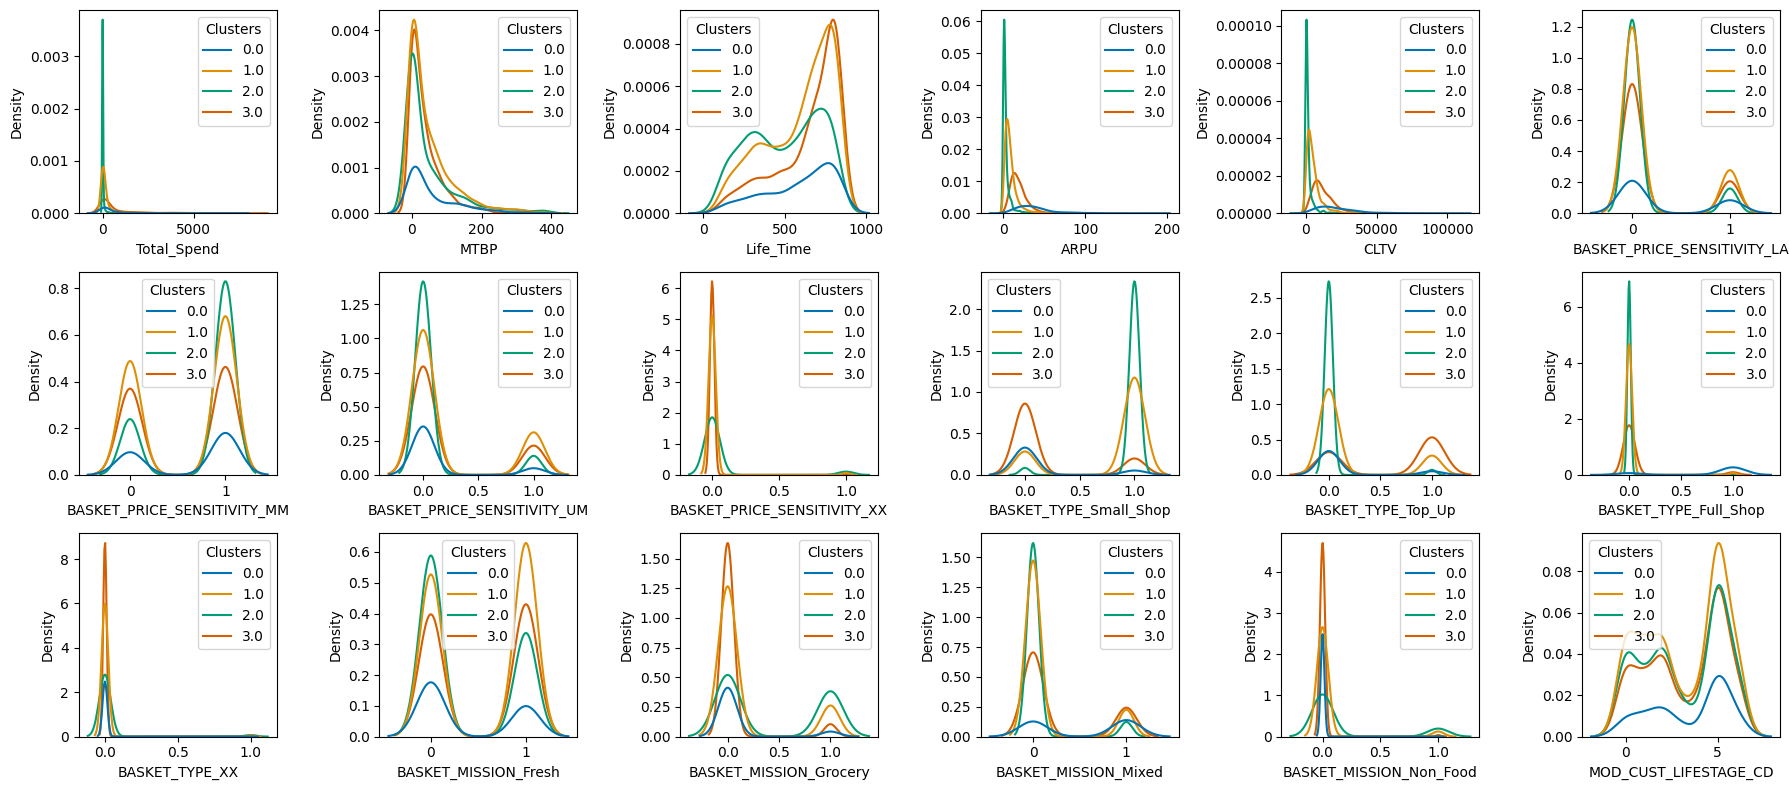

In [ ]:
palette = 'colorblind'
fig, axes = plt.subplots(3,6, figsize=(18,8), tight_layout=True)
axes = axes.ravel()
for col, ax in zip(clusters.iloc[:,1:].columns, axes):
    sns.kdeplot(data=clusters, x=col, hue='Clusters', palette=palette, ax=ax)
plt.show()

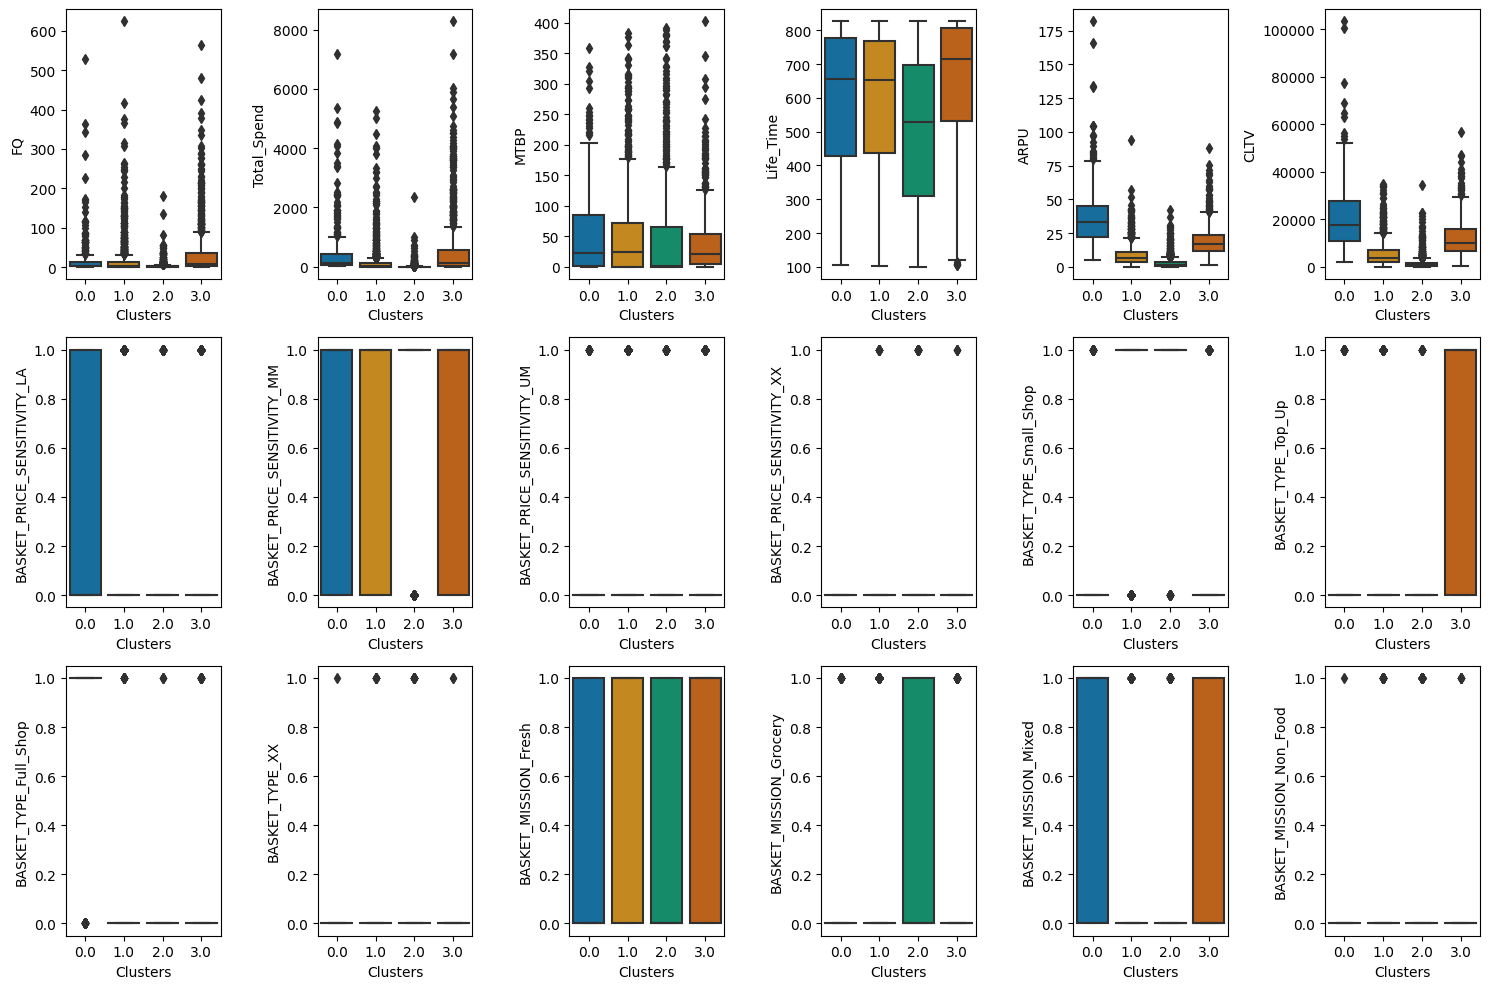

In [ ]:
fig, axes = plt.subplots(3,6, figsize=(15,10), tight_layout=True)
axes = axes.ravel()
for col, ax in zip(clusters.iloc[:,:-1].columns, axes):
    sns.boxplot(data=clusters, y=col, x='Clusters', palette=palette, ax=ax)
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import scale

X = clusters.iloc[:, :-1]  # Select all columns except the last one
y = clusters['Clusters']

# Drop rows with missing values in the target variable
#X = X.dropna()
y = y.fillna(0)

X_std = scale(X)

clf = RandomForestClassifier(criterion='entropy', random_state=42)
clf.fit(X_std, y)

RandomForestClassifier(criterion='entropy', random_state=42)

In [ ]:
fimp = pd.DataFrame({'feature': X.columns, 'importance' : clf.feature_importances_}).set_index('feature')
fimp.sort_values('importance', ascending=False)

,importance
feature,
BASKET_SIZE_S%,0.137160
BASKET_SIZE_L%,0.126555
ARPU,0.106245
BASKET_SIZE_M%,0.098411
CLTV,0.089909
Total_Spend,0.074974
BASKET_TYPE_Full_Shop,0.064918
BASKET_TYPE_Small_Shop,0.052138
MTBP,0.039970


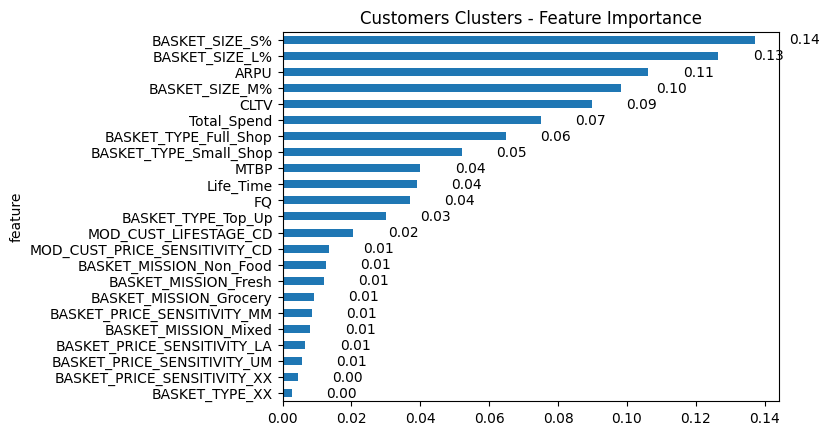

In [16]:
# Sort the DataFrame by importance in ascending order
fimp_sorted = fimp.sort_values('importance')

# Create a horizontal bar plot
ax = fimp_sorted.plot.barh(title='Customers Clusters - Feature Importance', legend=False)

# Display the importance numbers on the bars
for i, v in enumerate(fimp_sorted['importance']):
    ax.text(v + 0.01, i, f"{v:.2f}", color='black', va='center')

# Show the plot
plt.show()